In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import scipy.sparse as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas as pd
# Defining the path of a original dataset to the dataset file
file_path = '/Users/balakrishnareddy/Desktop/UB-PROJECTS/DIC/fake_job_postings 2.csv'
# reading the csv_file
data = pd.read_csv(file_path)
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
data.location = data.location.fillna('blank')
data1 = data[data['location'].str.contains("US")]


In [4]:
loc_split =[]
for loc in data1.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [5]:
len(data1)/len(data)

0.5959731543624162

In [6]:
data1 = data1.reset_index()


In [7]:
data1 = data1.join(loc_split)

In [8]:
data1 = data1[data1['city'].notna()]
data1 = data1[data1['state'].notna()]

In [9]:
data1.shape

(10593, 21)

In [10]:
data1['state_city'] = data1['state'] + ", " + data1['city']

In [11]:
data1.city = data1.city.str.strip()
data1.state = data1.state.str.strip()

In [12]:
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,state,city,state_city
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,...,0,Other,Internship,NaN,NaN,Marketing,0,NY,New York,"NY, New York"
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,IA,Wever,"IA, Wever"
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington"
3,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth"
4,5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0,MD,,"MD,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,0,Full-time,NaN,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco"
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,...,0,Contract,NaN,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte"
10653,17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0,,,","
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia"


In [13]:
#Standardizing Location Data: Splitting the data into three other columns as Country, state and city.
location_split = data1['location'].str.split(',', expand=True)
data1['country'] = location_split[0].str.strip()
data1['state'] = location_split[1].str.strip()
data1['city'] = location_split[2].str.strip()
#Standardizing Salary_range Data: Splitting the data into two other columns as min_salary and max_salary.
salary_split = data1['salary_range'].str.split('-', expand=True)
data1['min_salary'] = pd.to_numeric(salary_split[0], errors='coerce')
data1['max_salary'] = pd.to_numeric(salary_split[1], errors='coerce')
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,...,NaN,NaN,Marketing,0,NY,New York,"NY, New York",US,NaN,NaN
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,...,NaN,NaN,NaN,0,IA,Wever,"IA, Wever",US,NaN,NaN
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,NaN,NaN
3,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,NaN,NaN
4,5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,...,NaN,NaN,NaN,0,MD,,"MD,",US,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,NaN,NaN
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,...,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte",US,NaN,NaN
10653,17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.0,100000.0
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,NaN,NaN


In [14]:
# data imputation :  Filling missing values with the mean.
data1['min_salary'].fillna(data1['min_salary'].mean(), inplace=True)
data1['max_salary'].fillna(data1['max_salary'].mean(), inplace=True)
data1


,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,...,NaN,NaN,Marketing,0,NY,New York,"NY, New York",US,55072.312582,115256.455026
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,...,NaN,NaN,NaN,0,IA,Wever,"IA, Wever",US,55072.312582,115256.455026
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.312582,115256.455026
3,4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.312582,115256.455026
4,5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,...,NaN,NaN,NaN,0,MD,,"MD,",US,55072.312582,115256.455026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,NaN,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.312582,115256.455026
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,...,NaN,Utilities,NaN,0,NC,Charlotte,"NC, Charlotte",US,55072.312582,115256.455026
10653,17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.000000,100000.000000
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.312582,115256.455026


In [15]:
data1['country'].fillna("Not Specified", inplace=True)
data1['state'].fillna("Not Specified", inplace=True)
data1['requirements'].fillna("Not Specified", inplace=True)
data1['description'].fillna("Not Specified", inplace=True)
data1['benefits'].fillna("Not Specified", inplace=True)
data1['country'].fillna("Not Specified", inplace=True)
data1['city'].fillna("Not Specified", inplace=True)
data1['industry'].fillna("unstated", inplace=True)
data1['function'].fillna("unstated", inplace=True)
data1['department'].fillna("unstated", inplace=True)
data1['company_profile'].fillna("unstated", inplace=True)
data1['employment_type'].fillna("Not mentioned ", inplace=True)
data1['required_experience'].fillna("Not mentioned", inplace=True)
data1['required_education'].fillna("Not mentioned", inplace=True)
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.312582,115256.455026
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unstated,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.312582,115256.455026
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.312582,115256.455026
3,4,5,Bill Review Manager,"US, FL, Fort Worth",unstated,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.312582,115256.455026
4,5,6,Accounting Clerk,"US, MD,",unstated,NaN,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.312582,115256.455026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.312582,115256.455026
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",unstated,NaN,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.312582,115256.455026
10653,17874,17875,JavaScript Developer,"US, ,",unstated,80000-100000,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.000000,100000.000000
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.312582,115256.455026


In [16]:
data1['min_salary'] = data1['min_salary'].round(2)
data1['max_salary'] = data1['max_salary'].round(2)
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unstated,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,"US, FL, Fort Worth",unstated,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,"US, MD,",unstated,NaN,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",unstated,NaN,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,"US, ,",unstated,80000-100000,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [17]:
#To find all occurrences of one or more whitespace characters (\s+) and replaces them with a single space.remove HTML tags from the text. The pattern <[^>]+> matches any sequence of characters that starts with a <, ends with a >, and contains any characters except > in between
data1['company_profile'] = data1['company_profile'].str.replace('\s+', ' ', regex=True).str.strip()
data1['description'] = data1['description'].str.replace(r'<[^>]+>', '', regex=True)
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unstated,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,"US, FL, Fort Worth",unstated,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,"US, MD,",unstated,NaN,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",unstated,NaN,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,"US, ,",unstated,80000-100000,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [18]:
data1.columns

Index(['index', 'job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city', 'state_city', 'country', 'min_salary',
       'max_salary'],
      dtype='object')

In [19]:
data1 = data1[data1['city'].notna()]
data1 = data1[data1['state'].notna()]
data1.shape

(10593, 25)

In [20]:
data1['state_city'] = data1['state'] + ", " + data1['city']
data1

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unstated,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,"US, FL, Fort Worth",unstated,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,"US, MD,",unstated,NaN,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",unstated,NaN,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,"US, ,",unstated,80000-100000,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [21]:
# changing the names of columns.
data1.rename(columns={
    'title': 'Job_Role',
    'description': 'job_description',
    'requirements': 'job_requirements',
    'benefits': 'job_benefits',
    
}, inplace=True)
data1

,index,job_id,Job_Role,location,department,salary_range,company_profile,job_description,job_requirements,job_benefits,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",unstated,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,"US, FL, Fort Worth",unstated,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,"US, MD,",unstated,NaN,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,"US, NC, Charlotte",unstated,NaN,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,"US, ,",unstated,80000-100000,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [22]:
data1.dtypes

index                    int64
job_id                   int64
Job_Role                object
location                object
department              object
salary_range            object
company_profile         object
job_description         object
job_requirements        object
job_benefits            object
telecommuting            int64
has_company_logo         int64
has_questions            int64
employment_type         object
required_experience     object
required_education      object
industry                object
function                object
fraudulent               int64
state                   object
city                    object
state_city              object
country                 object
min_salary             float64
max_salary             float64
dtype: object

In [23]:
data1['department'] = data1['department'].astype('string')
data1['required_education'] = data1['required_education'].astype('string')
data1['required_experience'] = data1['required_experience'].astype('string')
data1['employment_type'] = data1['employment_type'].astype('string')
data1.dtypes

index                    int64
job_id                   int64
Job_Role                object
location                object
department              string
salary_range            object
company_profile         object
job_description         object
job_requirements        object
job_benefits            object
telecommuting            int64
has_company_logo         int64
has_questions            int64
employment_type         string
required_experience     string
required_education      string
industry                object
function                object
fraudulent               int64
state                   object
city                    object
state_city              object
country                 object
min_salary             float64
max_salary             float64
dtype: object

In [24]:
# Droping the columns from the dataset.
data1.drop('location', axis=1, inplace=True)
data1.drop('salary_range', axis=1, inplace=True)

data1

,index,job_id,Job_Role,department,company_profile,job_description,job_requirements,job_benefits,telecommuting,has_company_logo,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),unstated,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,unstated,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,unstated,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,0,0,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,Product Development,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,unstated,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,0,1,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,unstated,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,0,0,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [25]:
try:
    condition = (data1['fraudulent'] == 0 )&(data1['employment_type'].isnull()| data1['company_profile'].isnull() | data1['job_description'].isnull() | data1['job_requirements'].isnull())
    data1.drop(data1[condition].index, inplace=True)
    print(f"Total number of rows after filtering: {data1.shape[0]}")
except FileNotFoundError:
    print(f"File not found: Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Total number of rows after filtering: 10593


In [26]:
data1.drop_duplicates()

,index,job_id,Job_Role,department,company_profile,job_description,job_requirements,job_benefits,telecommuting,has_company_logo,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),unstated,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,unstated,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,unstated,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,0,0,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,Product Development,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,unstated,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,0,1,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,unstated,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,0,0,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


In [27]:
def plot_boxplot(data1,ft):
    data1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

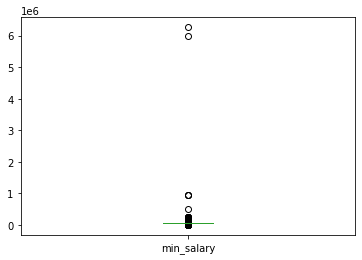

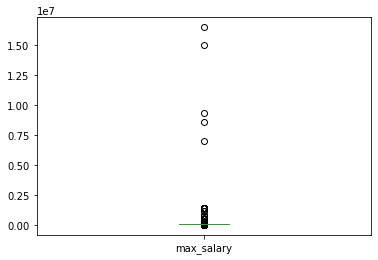

In [28]:
plot_boxplot(data1,'min_salary')
plot_boxplot(data1,'max_salary')

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10593 entries, 0 to 10655
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10593 non-null  int64  
 1   job_id               10593 non-null  int64  
 2   Job_Role             10593 non-null  object 
 3   department           10593 non-null  string 
 4   company_profile      10593 non-null  object 
 5   job_description      10593 non-null  object 
 6   job_requirements     10593 non-null  object 
 7   job_benefits         10593 non-null  object 
 8   telecommuting        10593 non-null  int64  
 9   has_company_logo     10593 non-null  int64  
 10  has_questions        10593 non-null  int64  
 11  employment_type      10593 non-null  string 
 12  required_experience  10593 non-null  string 
 13  required_education   10593 non-null  string 
 14  industry             10593 non-null  object 
 15  function             10593 non-null 

In [30]:
data1.isnull().sum()


index                  0
job_id                 0
Job_Role               0
department             0
company_profile        0
job_description        0
job_requirements       0
job_benefits           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
state                  0
city                   0
state_city             0
country                0
min_salary             0
max_salary             0
dtype: int64

In [31]:
data1.describe()

,index,job_id,telecommuting,has_company_logo,has_questions,fraudulent,min_salary,max_salary
count,10593.000000,10593.000000,10593.000000,10593.000000,10593.000000,10593.000000,1.059300e+04,1.059300e+04
mean,9127.171528,9128.171528,0.049561,0.755877,0.446144,0.068441,5.507231e+04,1.152565e+05
std,5204.400189,5204.400189,0.217046,0.429587,0.497114,0.252514,8.634179e+04,2.613467e+05
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,4634.000000,4635.000000,0.000000,1.000000,0.000000,0.000000,5.507231e+04,1.152565e+05
50%,9201.000000,9202.000000,0.000000,1.000000,0.000000,0.000000,5.507231e+04,1.152565e+05
75%,13660.000000,13661.000000,0.000000,1.000000,1.000000,0.000000,5.507231e+04,1.152565e+05
max,17877.000000,17878.000000,1.000000,1.000000,1.000000,1.000000,6.266624e+06,1.650000e+07


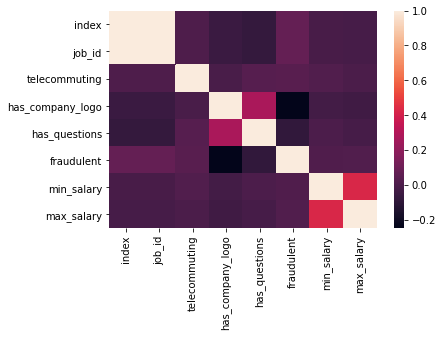

In [32]:
corr = data1.corr()
sns.heatmap(corr)
plt.show()

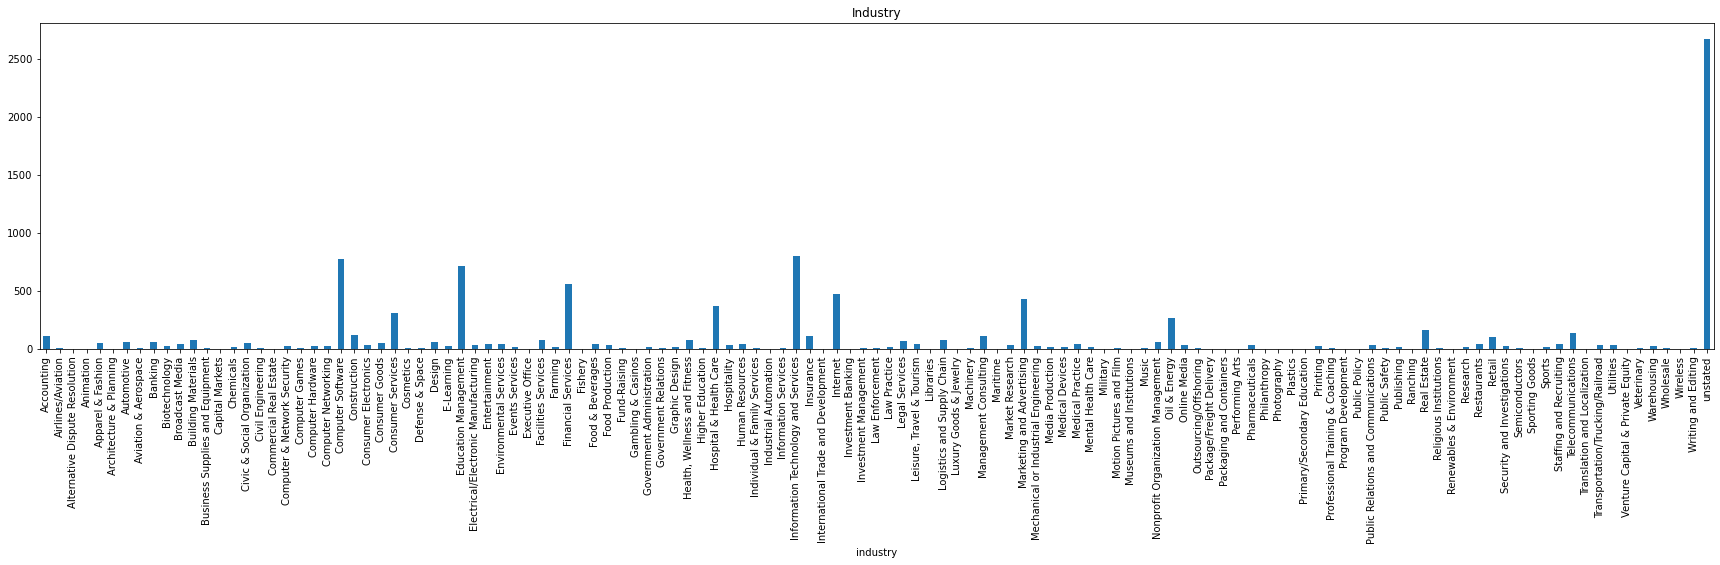

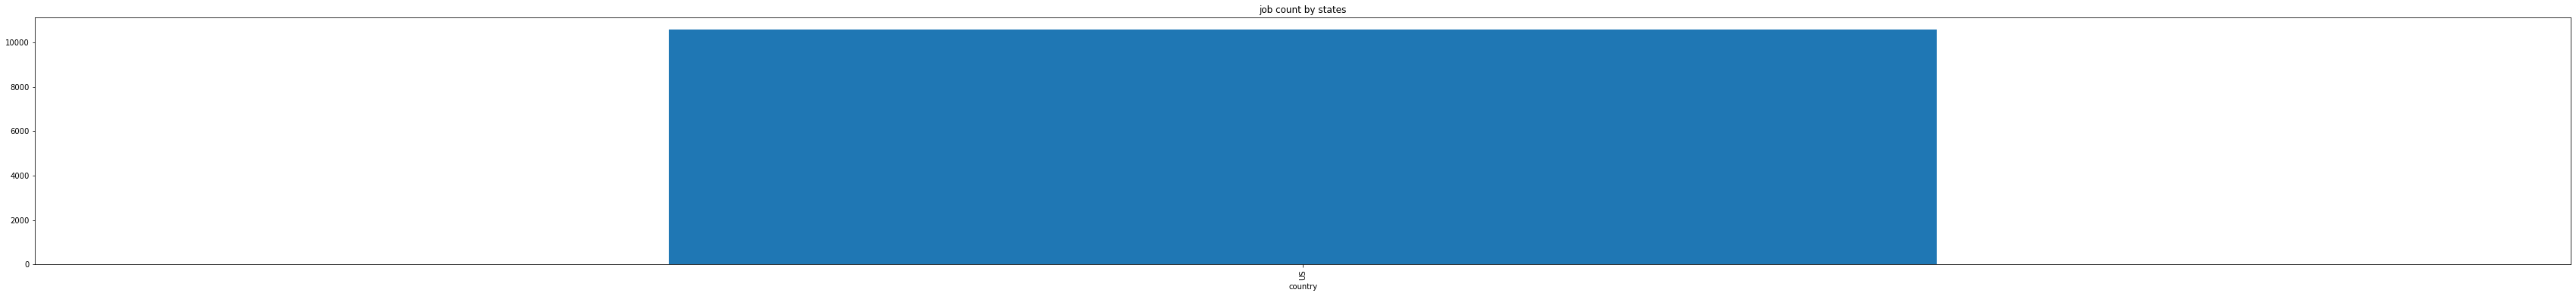

In [33]:
plt.figure(figsize=(30,6))
data1.groupby('industry').fraudulent.count().plot(kind='bar', title='Industry');
plt.figure(figsize=(60,6))
data1.groupby('country').fraudulent.count().plot(kind='bar', title='job count by states');

In [34]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=data1, hue="fraudulent",
              order=data1[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + 'fake_job_count'
    plt.title(title)
    plt.show()
    

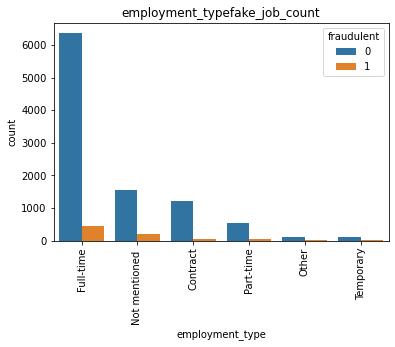

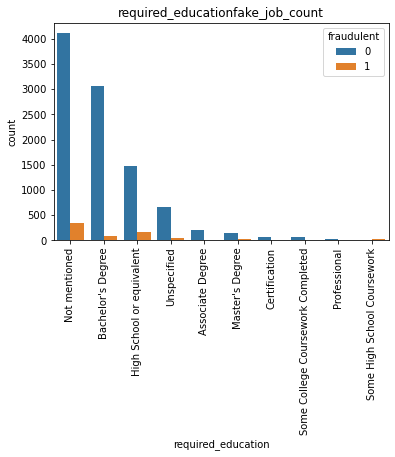

In [35]:
sns_countplot('employment_type');
sns_countplot('required_education');




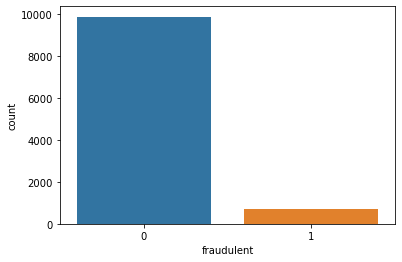

In [36]:
sns.countplot(x='fraudulent', data=data1);

In [37]:
location_ratio = round(data1[data1.fraudulent == 1].groupby('state_city').state_city.count()/data1[data1.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})
data1

,index,job_id,Job_Role,department,company_profile,job_description,job_requirements,job_benefits,telecommuting,has_company_logo,...,required_education,industry,function,fraudulent,state,city,state_city,country,min_salary,max_salary
0,0,1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Specified,0,1,...,Not mentioned,unstated,Marketing,0,NY,New York,"NY, New York",US,55072.31,115256.46
1,2,3,Commissioning Machinery Assistant (CMA),unstated,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Specified,0,1,...,Not mentioned,unstated,unstated,0,IA,Wever,"IA, Wever",US,55072.31,115256.46
2,3,4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Bachelor's Degree,Computer Software,Sales,0,DC,Washington,"DC, Washington",US,55072.31,115256.46
3,4,5,Bill Review Manager,unstated,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,FL,Fort Worth,"FL, Fort Worth",US,55072.31,115256.46
4,5,6,Accounting Clerk,unstated,unstated,Job OverviewApex is an environmental consultin...,Not Specified,Not Specified,0,0,...,Not mentioned,unstated,unstated,0,MD,,"MD,",US,55072.31,115256.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10651,17872,17873,Product Manager,Product Development,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,...,Not mentioned,Internet,Product Management,0,CA,San Francisco,"CA, San Francisco",US,55072.31,115256.46
10652,17873,17874,Recruiting Coordinator,unstated,unstated,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,Not Specified,0,1,...,Not mentioned,Utilities,unstated,0,NC,Charlotte,"NC, Charlotte",US,55072.31,115256.46
10653,17874,17875,JavaScript Developer,unstated,unstated,"Sr, JavaScript Developer Experience : 4-10 yea...",Not Specified,Not Specified,0,0,...,Bachelor's Degree,Computer Software,Information Technology,0,,,",",US,80000.00,100000.00
10654,17876,17877,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,...,Bachelor's Degree,Internet,Accounting/Auditing,0,PA,Philadelphia,"PA, Philadelphia",US,55072.31,115256.46


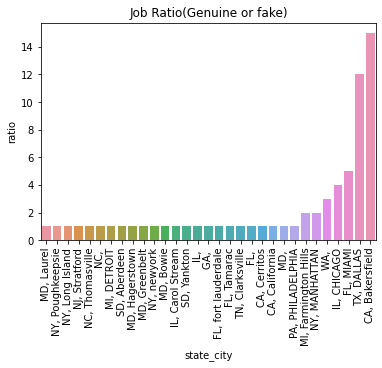

In [38]:
data1 = data1.merge(location_ratio)
data1.ratio.fillna(0, inplace=True)
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Job Ratio(Genuine or fake)')
plt.show()

In [39]:
data1['text'] = data1['company_profile'] + ' ' + \
        data1['job_description'] + ' ' + data1['job_requirements'] + ' ' + data1['job_benefits'] + ' ' + \
        data1['required_experience'] + ' ' + data1['required_education'] + ' ' + data1['industry'] + ' ' + data1['function']
data1.drop(['company_profile','job_description','job_requirements','job_benefits','required_experience','required_education','industry','function'], axis = 1, inplace = True)
data1

,index,job_id,Job_Role,department,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,state,city,state_city,country,min_salary,max_salary,ratio,text
0,0,1,Marketing Intern,Marketing,0,1,0,Other,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,"We're Food52, and we've created a groundbreaki..."
1,18,19,Visual Designer,unstated,0,1,0,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Kettle is an independent digital agency based ...
2,25,26,H1B SPONSOR FOR L1/L2/OPT,unstated,0,1,1,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,i28 Technologies has demonstrated expertise in...
3,52,53,Payroll Tax Specialist,unstated,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Namely is the leading end-to-end HR and payrol...
4,90,91,Marketing Manager,Marketing,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Super Soccer Stars is the country's most popul...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,17824,17825,Military Benefits Counselor,HR,1,1,1,Not mentioned,1,,chicago,", chicago",US,55072.31,115256.46,0.00,Anthony Warren is a Marketing and Advertising ...
10589,17835,17836,Sr.Business Intelligence Technical Architect,Information Technology,0,1,1,Not mentioned,0,CA,Silicon Valley/San Jose - Santa Clara,"CA, Silicon Valley/San Jose - Santa Clara",US,55072.31,115256.46,0.00,Roland &amp; Associates is a Corporate Recruit...
10590,17836,17837,Licensed Practical Nurse (LPN)- Private Duty,Nursing,0,1,0,Not mentioned,0,MO,Independence,"MO, Independence",US,55072.31,115256.46,0.00,Phoenix Home Care came to be as a result of ou...
10591,17839,17840,SAS Grid Developer,unstated,0,0,0,Contract,0,NJ,Berkeley Heights,"NJ, Berkeley Heights",US,55072.31,115256.46,0.00,unstated Job Title: SAS Grid DeveloperDuration...


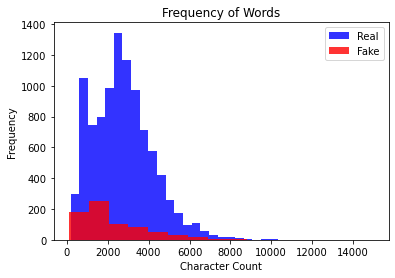

In [40]:
data1['character_count'] = data1.text.apply(len)

data1[data1.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
data1[data1.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

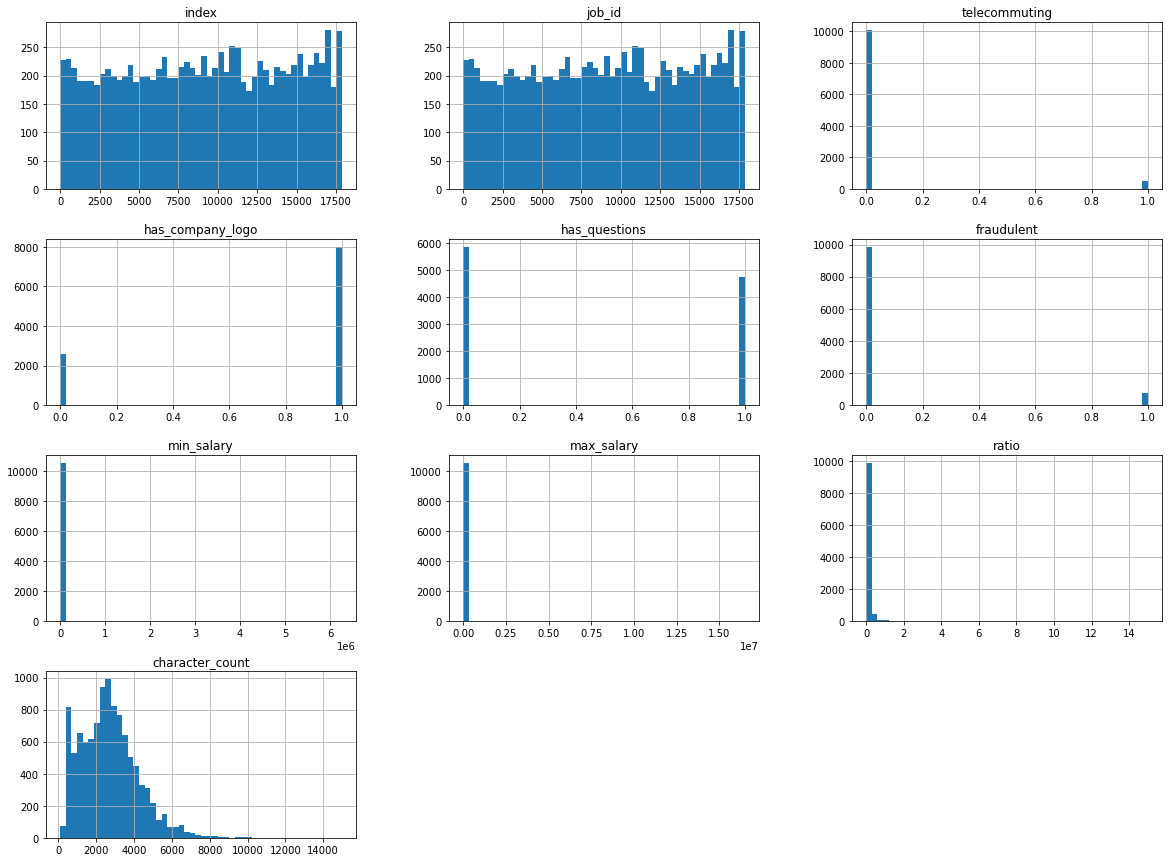

In [41]:
data1.hist(bins=50, figsize=(20,15))
plt.show()

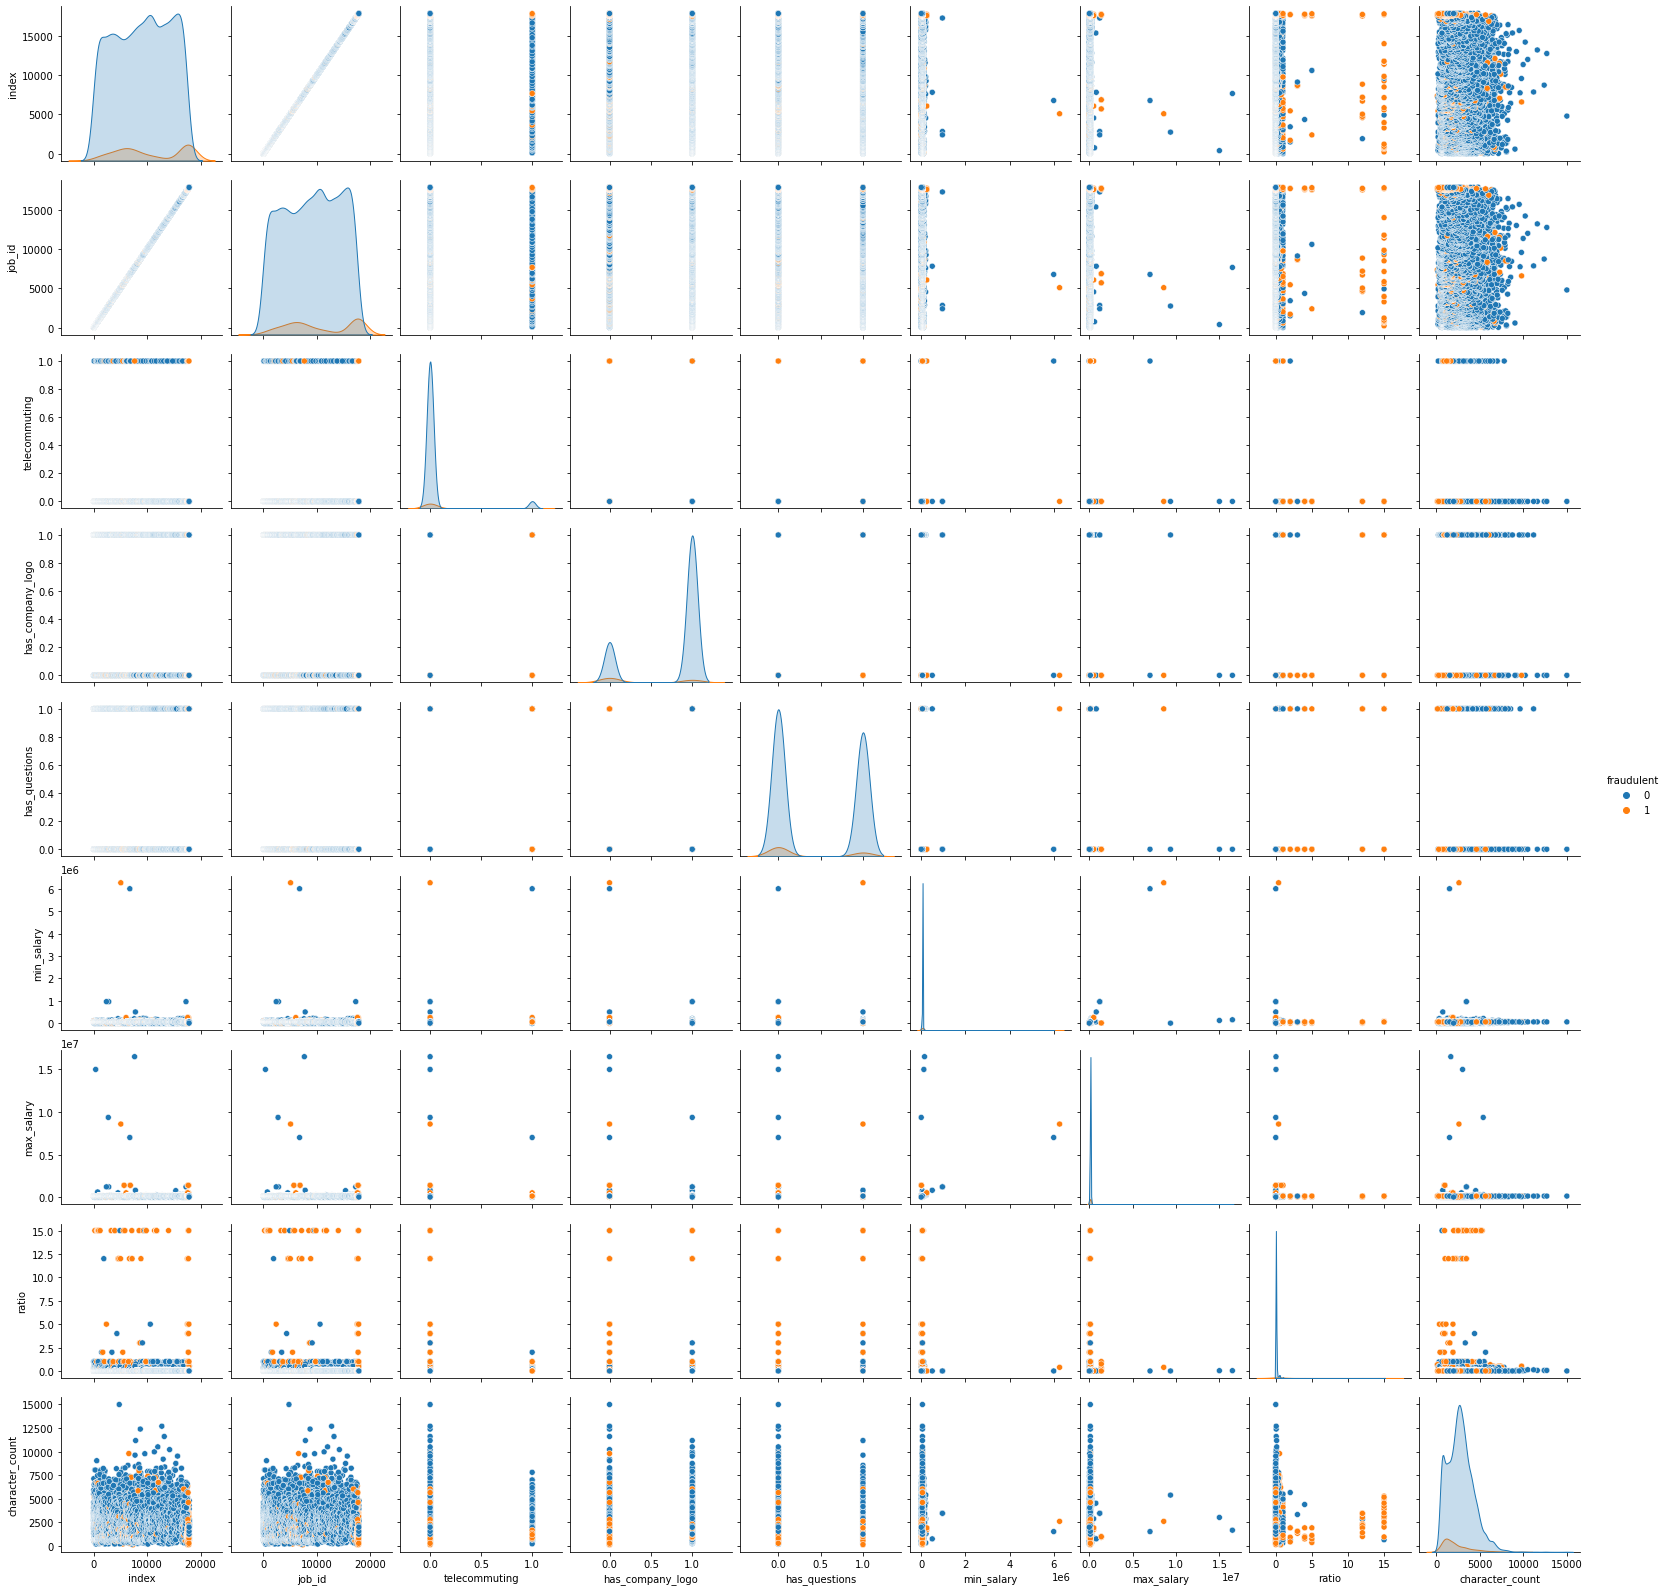

In [42]:
sns.pairplot(data1.select_dtypes(include=['float64', 'int64']), hue='fraudulent')
plt.show()

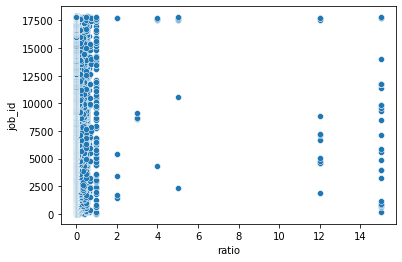

In [43]:
sns.scatterplot(data=data1,x="ratio",y="job_id")
plt.show()

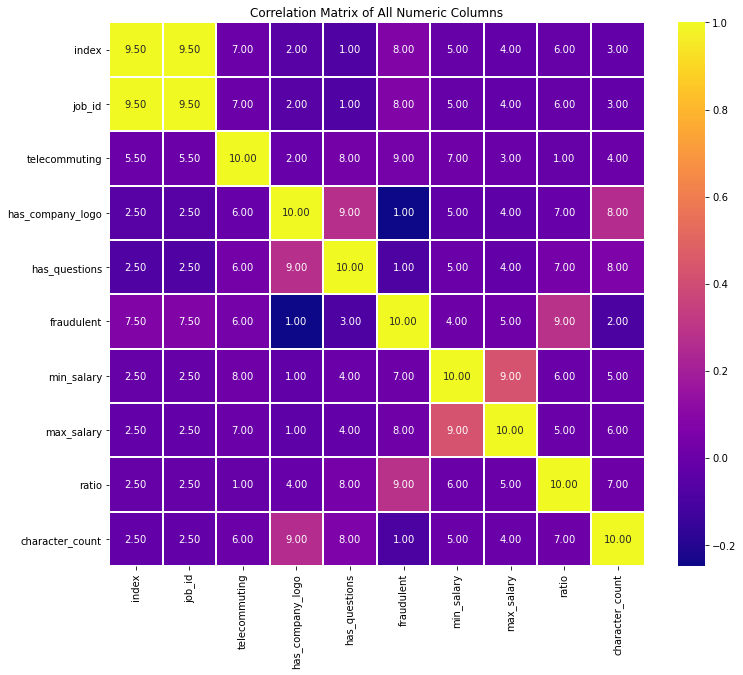

In [44]:
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=correlation_matrix.rank(axis='columns'), fmt=".2f", cmap='plasma',linewidths=1.0)
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score




In [46]:
data1

,index,job_id,Job_Role,department,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,state,city,state_city,country,min_salary,max_salary,ratio,text,character_count
0,0,1,Marketing Intern,Marketing,0,1,0,Other,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,"We're Food52, and we've created a groundbreaki...",2702
1,18,19,Visual Designer,unstated,0,1,0,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Kettle is an independent digital agency based ...,2020
2,25,26,H1B SPONSOR FOR L1/L2/OPT,unstated,0,1,1,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,i28 Technologies has demonstrated expertise in...,7125
3,52,53,Payroll Tax Specialist,unstated,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Namely is the leading end-to-end HR and payrol...,1567
4,90,91,Marketing Manager,Marketing,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Super Soccer Stars is the country's most popul...,2836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,17824,17825,Military Benefits Counselor,HR,1,1,1,Not mentioned,1,,chicago,", chicago",US,55072.31,115256.46,0.00,Anthony Warren is a Marketing and Advertising ...,1178
10589,17835,17836,Sr.Business Intelligence Technical Architect,Information Technology,0,1,1,Not mentioned,0,CA,Silicon Valley/San Jose - Santa Clara,"CA, Silicon Valley/San Jose - Santa Clara",US,55072.31,115256.46,0.00,Roland &amp; Associates is a Corporate Recruit...,1241
10590,17836,17837,Licensed Practical Nurse (LPN)- Private Duty,Nursing,0,1,0,Not mentioned,0,MO,Independence,"MO, Independence",US,55072.31,115256.46,0.00,Phoenix Home Care came to be as a result of ou...,2096
10591,17839,17840,SAS Grid Developer,unstated,0,0,0,Contract,0,NJ,Berkeley Heights,"NJ, Berkeley Heights",US,55072.31,115256.46,0.00,unstated Job Title: SAS Grid DeveloperDuration...,1541


In [47]:

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data1['text'].fillna(''))

mean_tfidf_scores = tfidf_matrix.mean(axis=1)
mean_tfidf_scores_array = mean_tfidf_scores.A1
data1['mean_tfidf_score'] = mean_tfidf_scores_array
data1
other_features = data1[['telecommuting', 'ratio','min_salary','max_salary', 'has_company_logo', 'has_questions']]
other_features_matrix = sp.csr_matrix(other_features.values)
X_combined = sp.hstack([tfidf_matrix, other_features_matrix], format='csr')
from sklearn.model_selection import train_test_split
y = data1['fraudulent'].values
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [48]:
data1

,index,job_id,Job_Role,department,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,state,city,state_city,country,min_salary,max_salary,ratio,text,character_count,mean_tfidf_score
0,0,1,Marketing Intern,Marketing,0,1,0,Other,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,"We're Food52, and we've created a groundbreaki...",2702,0.007968
1,18,19,Visual Designer,unstated,0,1,0,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Kettle is an independent digital agency based ...,2020,0.008137
2,25,26,H1B SPONSOR FOR L1/L2/OPT,unstated,0,1,1,Not mentioned,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,i28 Technologies has demonstrated expertise in...,7125,0.008592
3,52,53,Payroll Tax Specialist,unstated,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Namely is the leading end-to-end HR and payrol...,1567,0.007331
4,90,91,Marketing Manager,Marketing,0,1,0,Full-time,0,NY,New York,"NY, New York",US,55072.31,115256.46,0.03,Super Soccer Stars is the country's most popul...,2836,0.008219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,17824,17825,Military Benefits Counselor,HR,1,1,1,Not mentioned,1,,chicago,", chicago",US,55072.31,115256.46,0.00,Anthony Warren is a Marketing and Advertising ...,1178,0.006772
10589,17835,17836,Sr.Business Intelligence Technical Architect,Information Technology,0,1,1,Not mentioned,0,CA,Silicon Valley/San Jose - Santa Clara,"CA, Silicon Valley/San Jose - Santa Clara",US,55072.31,115256.46,0.00,Roland &amp; Associates is a Corporate Recruit...,1241,0.006081
10590,17836,17837,Licensed Practical Nurse (LPN)- Private Duty,Nursing,0,1,0,Not mentioned,0,MO,Independence,"MO, Independence",US,55072.31,115256.46,0.00,Phoenix Home Care came to be as a result of ou...,2096,0.006253
10591,17839,17840,SAS Grid Developer,unstated,0,0,0,Contract,0,NJ,Berkeley Heights,"NJ, Berkeley Heights",US,55072.31,115256.46,0.00,unstated Job Title: SAS Grid DeveloperDuration...,1541,0.007159


# logisticRegression

In [49]:
model = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary
model.fit(X_train, y_train)
LR= model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, LR)}")

Accuracy: 0.9325153374233128


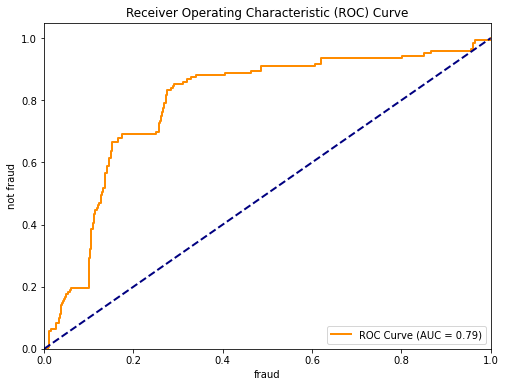

In [50]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,
1])
auc = roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('fraud')
plt.ylabel('not fraud')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# MultinomialNB 

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
pred = nb_classifier.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.927796130250118

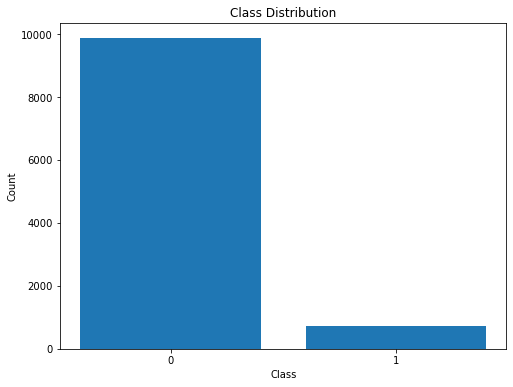

In [52]:
class_counts = np.bincount(y)
plt.figure(figsize=(8, 6))
plt.bar(range(len(class_counts)), class_counts)
plt.xticks(range(len(class_counts)), range(len(class_counts)))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

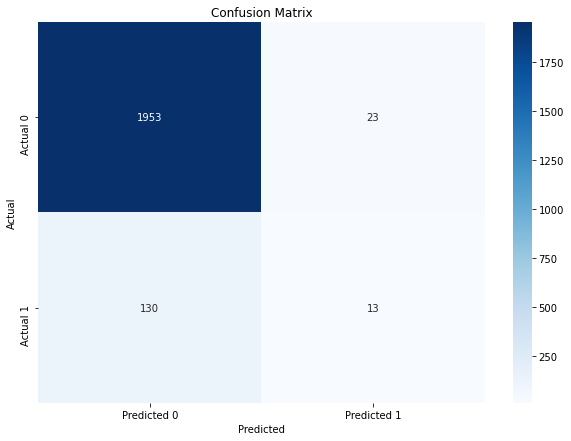

In [53]:
cf_matrix= confusion_matrix(y_test, pred)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
Accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {Accuracy}')

Precision: 0.8434782608695652
Recall: 0.6783216783216783
F1: 0.751937984496124
Accuracy: 0.9697970740915526


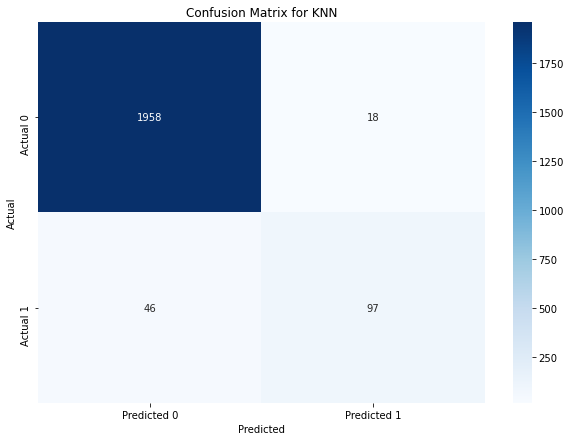

In [55]:
cf_matrix= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN')
plt.show()

# SVC

In [56]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')

SVM Accuracy: 0.9334591788579518


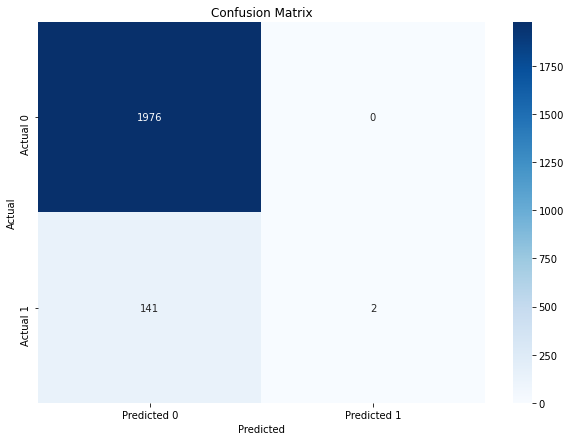

In [57]:
cf_matrix= confusion_matrix(y_test,y_pred_svm )
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# DECISION TREE

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')


Precision: 0.7181208053691275
Recall: 0.7482517482517482
F1: 0.7328767123287672
Decision Tree Accuracy: 0.9631901840490797


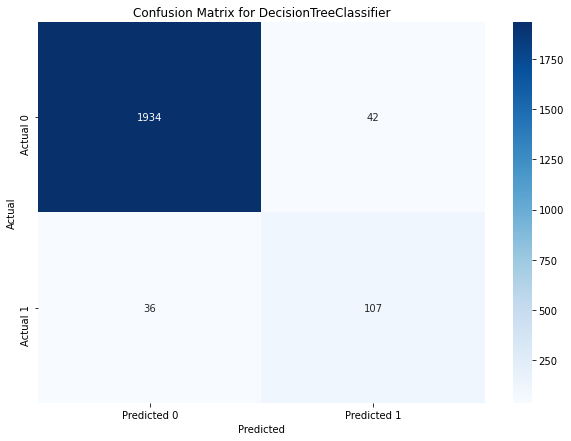

In [59]:
cf_matrix= confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

# RandomForest

In [60]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters
random_forest_model.fit(X_train, y_train)
prediction = random_forest_model.predict(X_test)
precision = precision_score(y_test, prediction )
recall = recall_score(y_test, prediction )
f1 = f1_score(y_test, prediction )

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

# Evaluate the model's performance
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy of the Random Forest model: {accuracy}")


Precision: 1.0
Recall: 0.5804195804195804
F1: 0.7345132743362832
Accuracy of the Random Forest model: 0.9716847569608306


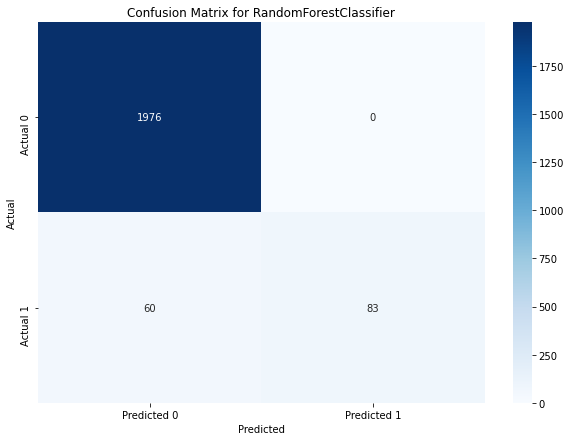

In [61]:
cf_matrix= confusion_matrix(y_test,prediction)
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



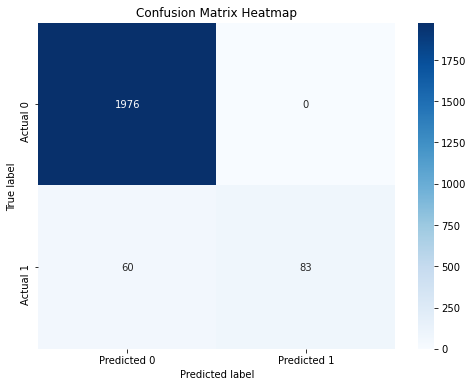

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cm' is the confusion matrix you calculated earlier
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

features_df = data1[['telecommuting', 'ratio', 'min_salary', 'max_salary', 'has_company_logo', 'has_questions', 'mean_tfidf_score']]
feature_names = features_df.columns.tolist()
y = data1['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

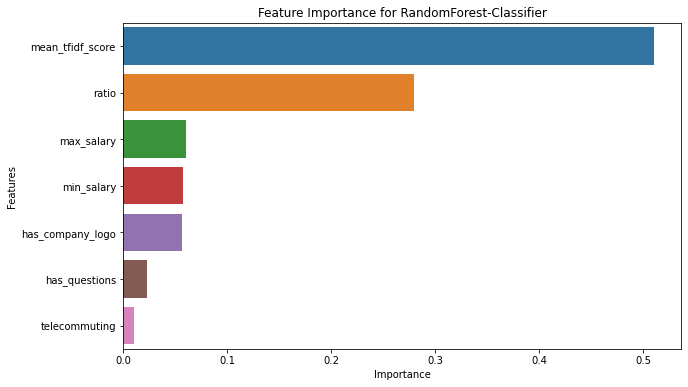

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForest-Classifier')
plt.show()


In [66]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [67]:

feature_importances = pd.DataFrame(decision_tree_model.feature_importances_, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)


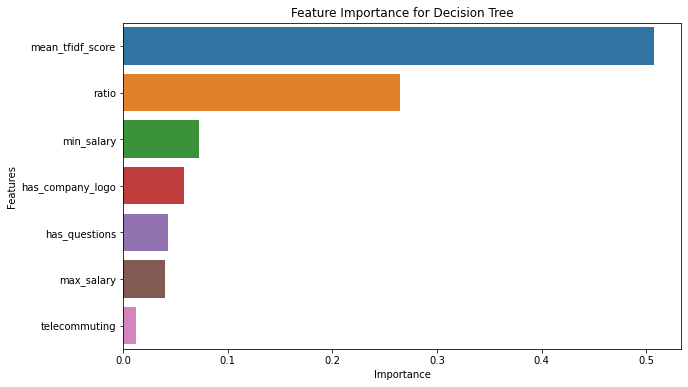

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Decision Tree')
plt.show()


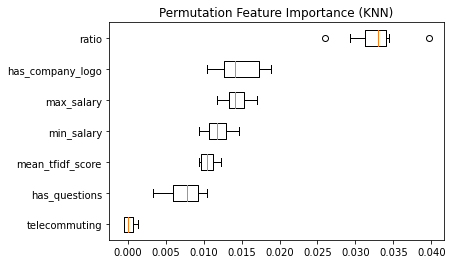

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)
# Visualize the feature importances
sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Feature Importance (KNN)")
plt.show()

# GaussianNB

Initial Model Accuracy: 0.9334591788579518


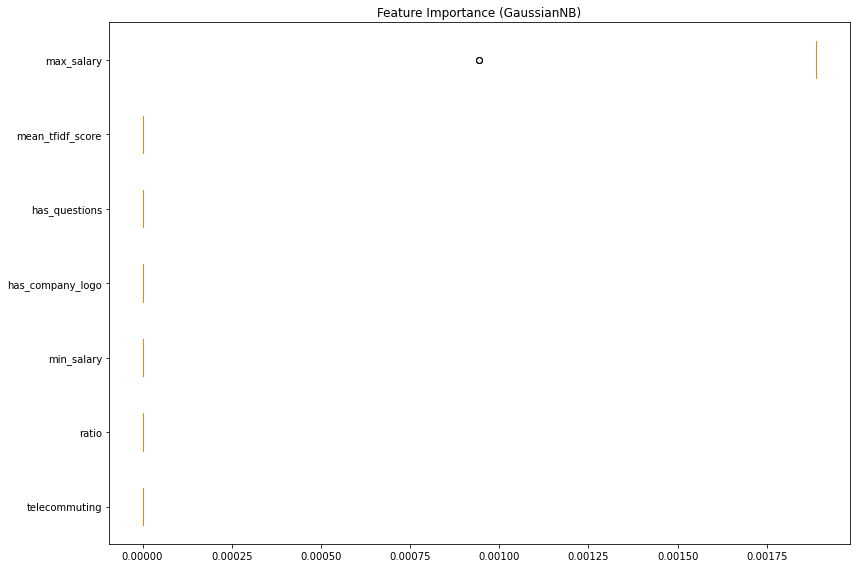

In [71]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
model = GaussianNB()
model.fit(X_train, y_train)

initial_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Initial Model Accuracy: {initial_accuracy}")

result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Feature Importance (GaussianNB)")
plt.tight_layout()
plt.show()


# SGD

In [72]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred1 = sgd_clf.predict(X_test)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')


Precision: 0.06560540279787747
Recall: 0.951048951048951
F1 Score: 0.12274368231046931
Accuracy: 0.08258612553091081


In [94]:
import pickle
filename = "Fake_job7.sav"
pickle.dump(sgd_clf, open(filename,'wb'))

In [95]:
load_model = pickle.load(open(filename,'rb'))

In [96]:
X_test.head()

,telecommuting,ratio,min_salary,max_salary,has_company_logo,has_questions,mean_tfidf_score
8099,0,12.00,55072.31,115256.46,0,0,0.007560
9689,0,0.00,0.00,50000.00,1,0,0.006106
1793,0,0.01,55072.31,115256.46,1,1,0.007053
7386,0,0.00,55072.31,115256.46,1,1,0.009622
10568,0,0.00,55072.31,115256.46,0,0,0.006257


In [97]:
load_model.predict([[0, 12.00, 55072.31, 115256.46, 0, 0, 0.007560]])

array([1])